Outlier Detection Summary:
             Feature  Number of Outliers  Lower Bound  Upper Bound
0     bill_length_mm                   0      25.5875      62.0875
1      bill_depth_mm                   0      10.9500      23.3500
2  flipper_length_mm                   0     155.5000     247.5000
3        body_mass_g                   3    1703.1250    6628.1250


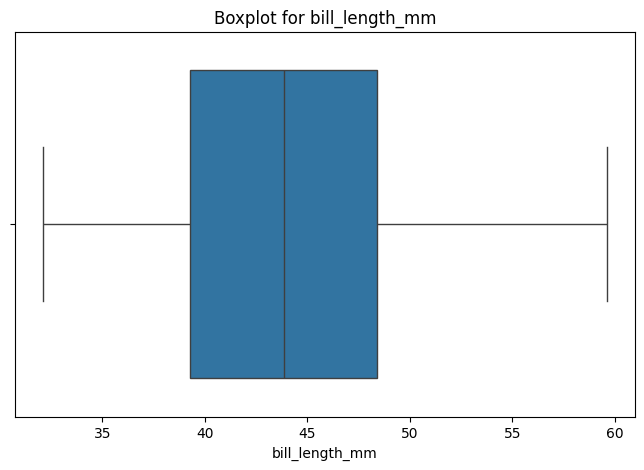

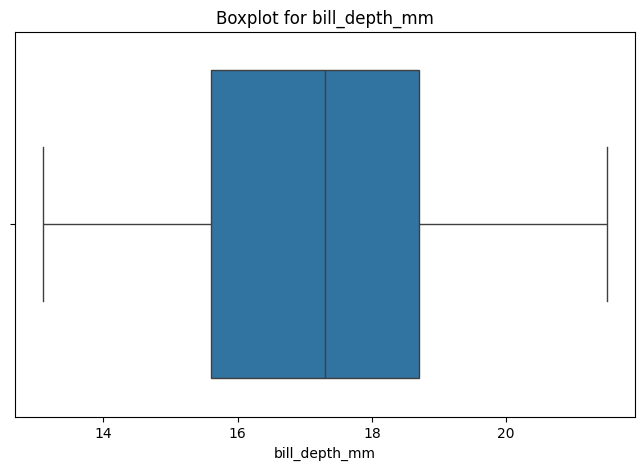

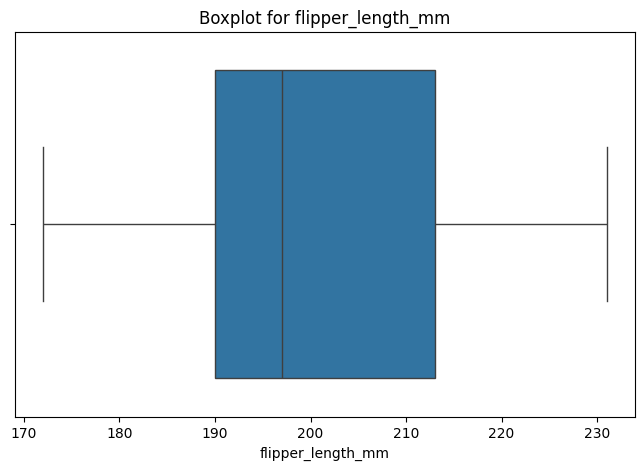

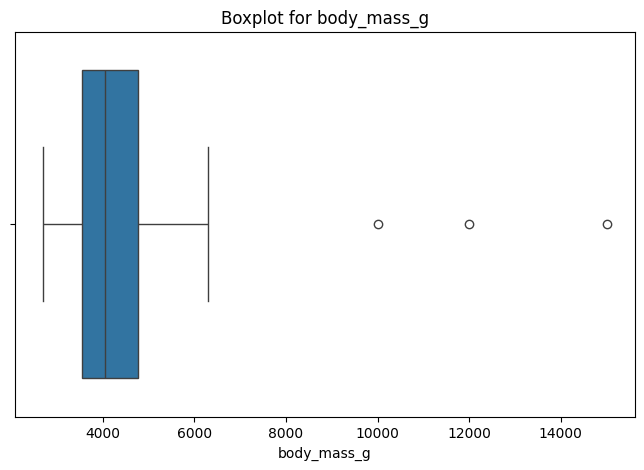

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'cleaned_dataset.csv'  
data = pd.read_csv(file_path)

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

numerical_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
outlier_summary = []

for col in numerical_cols:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(data, col)
    outlier_summary.append({
        'Feature': col,
        'Number of Outliers': len(outliers),
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
    })

outlier_summary_df = pd.DataFrame(outlier_summary)

print("Outlier Detection Summary:")
print(outlier_summary_df)

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot for {col}")
    plt.xlabel(col)
    plt.show()